## Census Income Dataset

## Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



### Reading the data using pandas module.

In [148]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

In [77]:
df = pd.read_csv('./data/adult_preprocessed.csv',index_col=0)

In [78]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check for null values and get a summary of all the columns in the dataset

In [79]:
missing_columns = (df.isnull().sum()*100)/len(df)
missing_columns

age               0.0
Workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
Income            0.0
dtype: float64

In [80]:
# Get a summary of the columns in the dataset
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


### For further analysis split to bring all the continuous variables together and categorical variables together.

In [81]:
# Seperate continuous variables and categorical variable
df.dtypes

age                int64
Workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income             int64
dtype: object

In [82]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [83]:
newdf = df.select_dtypes(include=numerics)
categorical = df.drop(newdf.columns, axis =1)

In [84]:
categorical.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [113]:
continous.head()

,age,fnlwgt,education-num,hours-per-week,Income
0,39,77516,13,40,0
1,50,83311,13,13,0
2,38,215646,9,40,0
3,53,234721,7,40,0
4,28,338409,13,40,0


###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

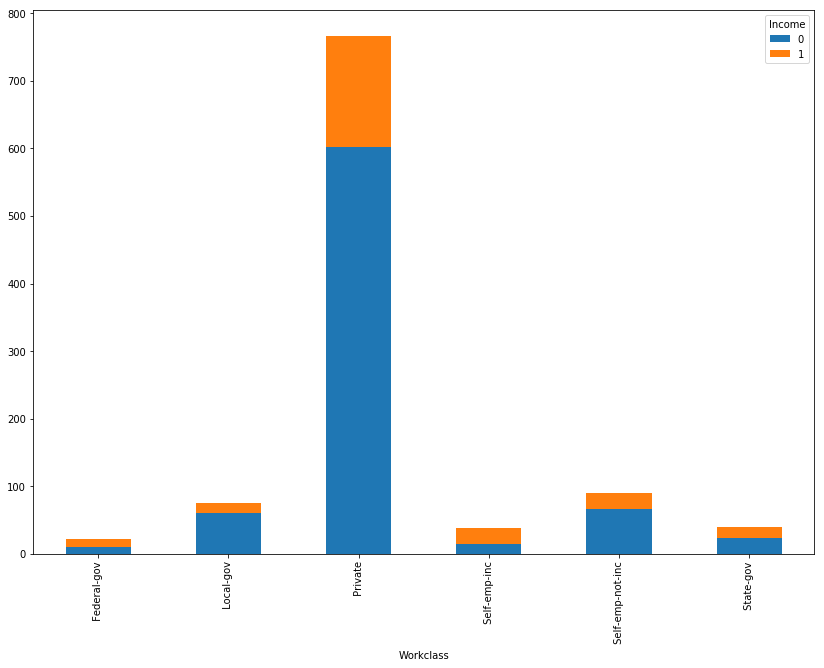

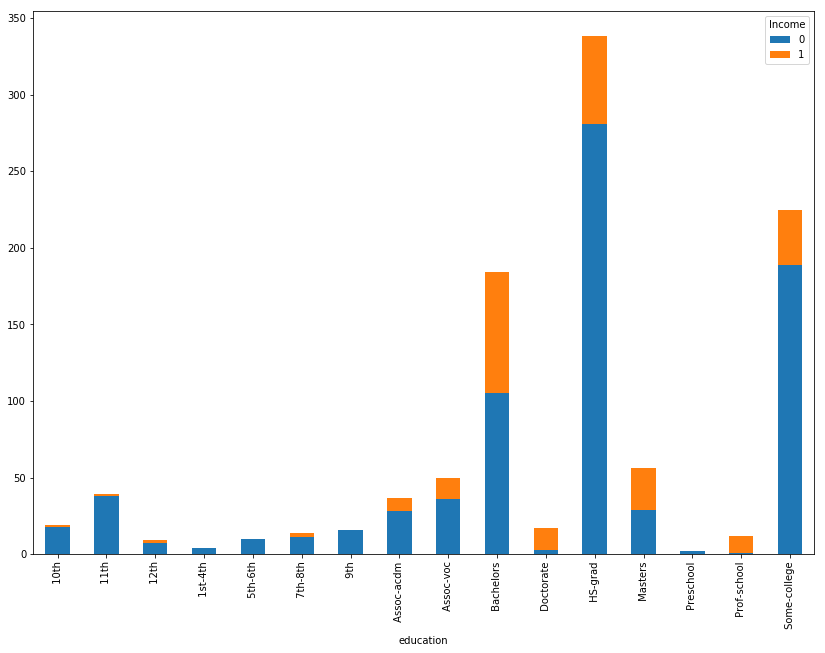

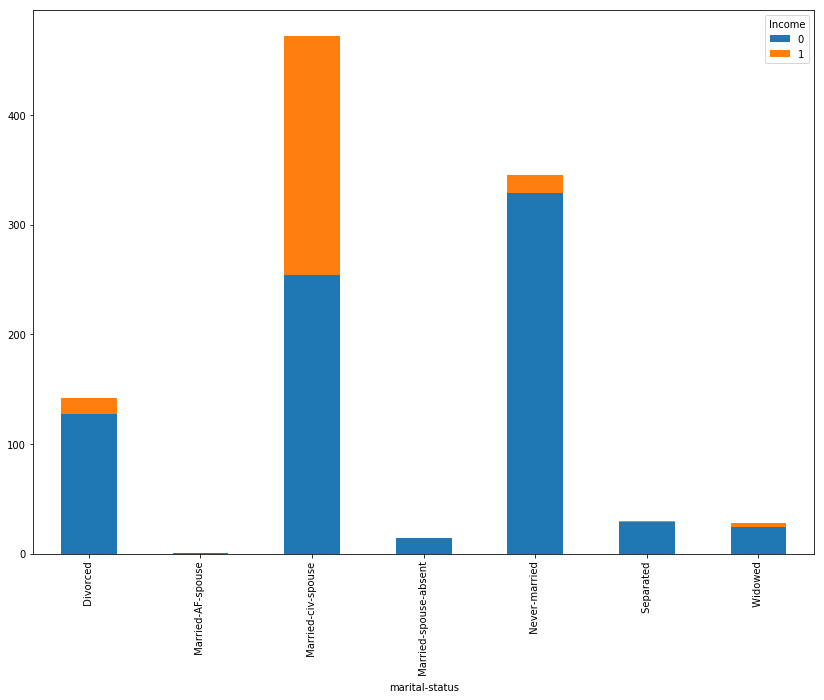

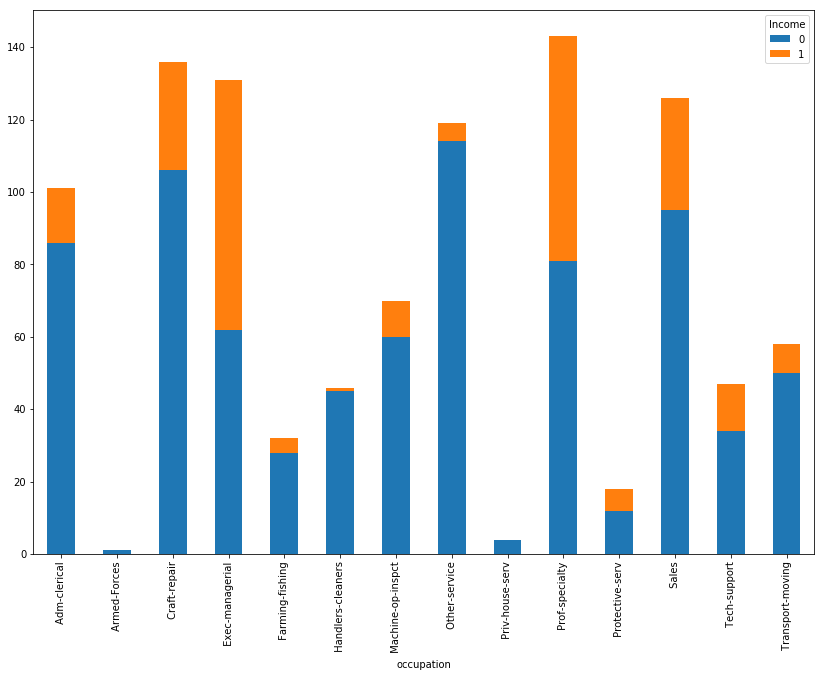

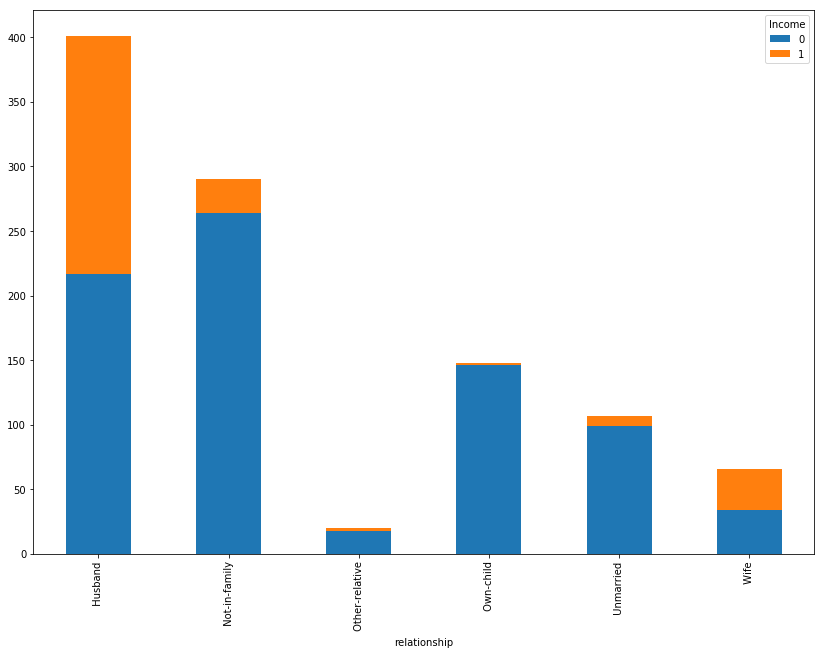

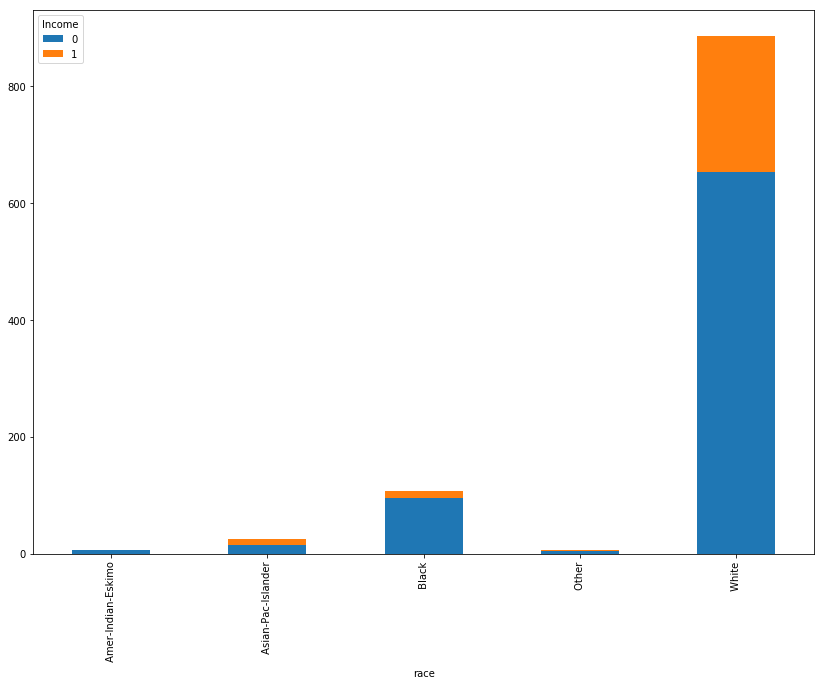

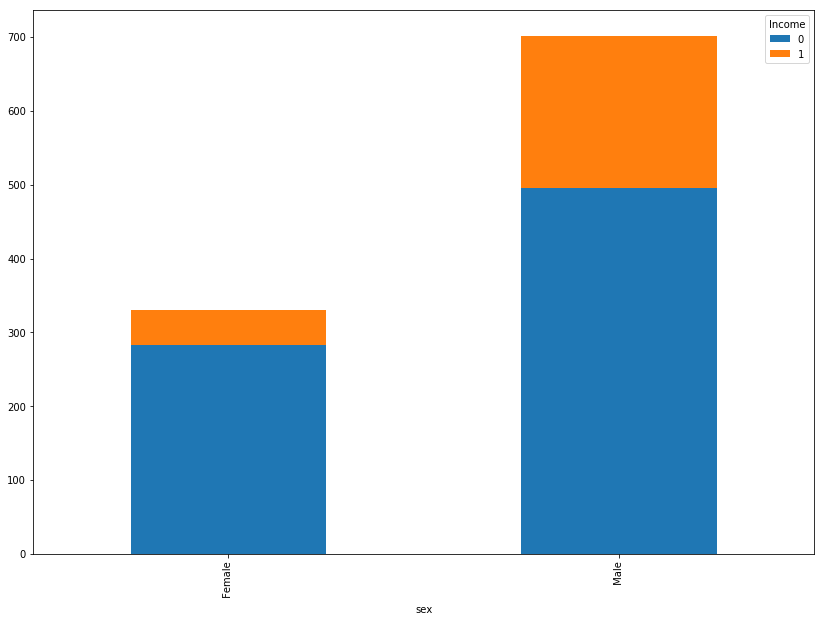

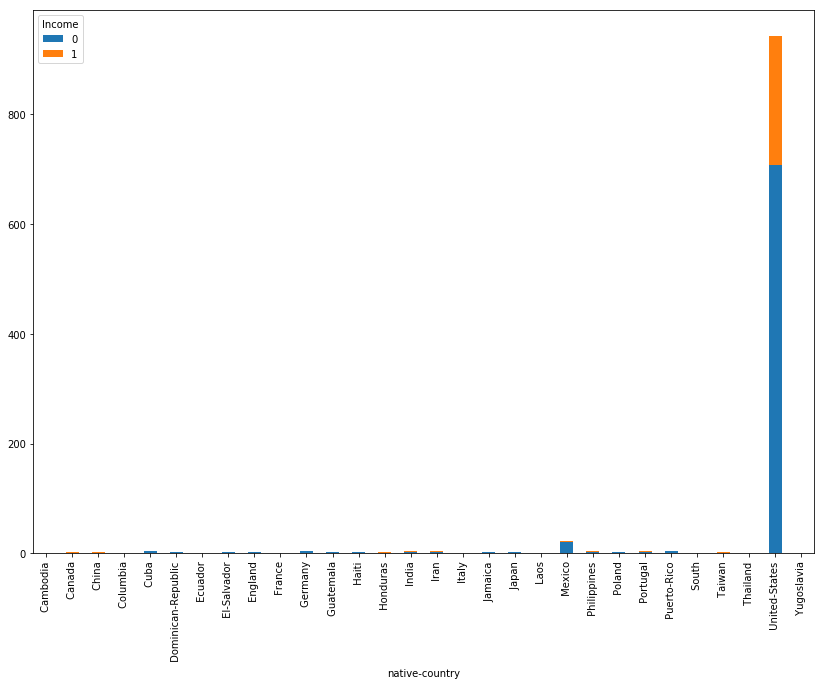

In [85]:
for i in categorical.columns:
    df.groupby(i)['Income'].value_counts().unstack().plot(kind = 'bar', stacked = True, figsize = (14,10))

### Plot a histogram for all the continuous variables to check for skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000229F2F0D6A0>,
      dtype=object)

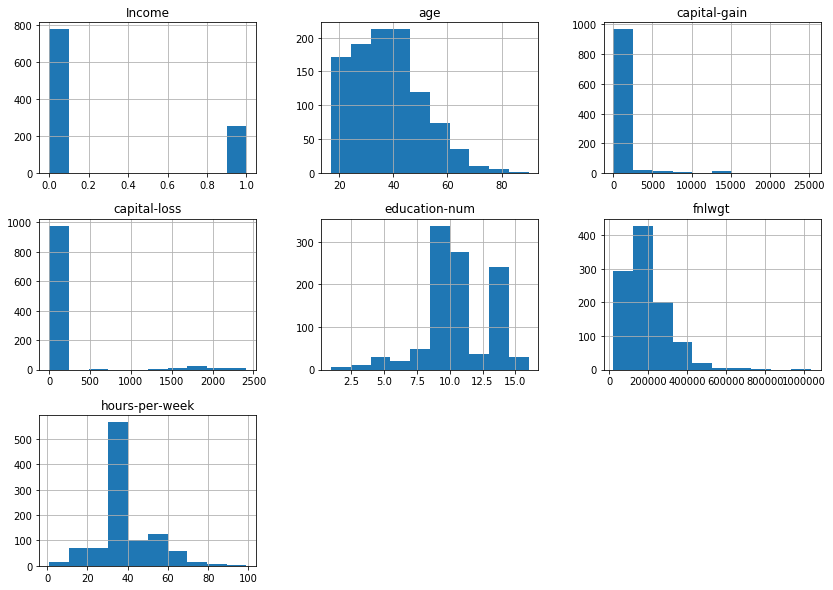

In [86]:
continous.hist(figsize = (14,10))

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [87]:
df.drop(['capital-gain','capital-loss'], inplace = True, axis = 1)

### Check for skewness in the continuous data

In [ ]:
#Already Checked

### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

In [114]:
continous['fnlwgt'] = continous['fnlwgt'].apply(np.log)

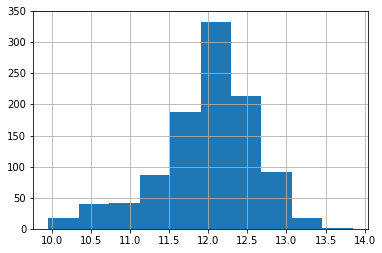

In [115]:
continous['fnlwgt'].hist()
#Skewness is removed

### Check for the pearson correlation between the continuous variables by plotting a heatmap

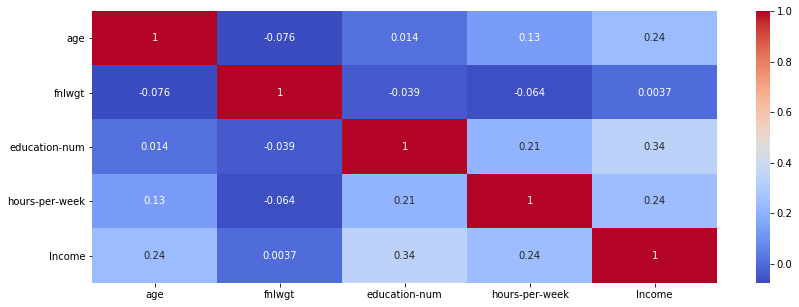

In [116]:
# Check for correlation between continuous variables
corr = continous.corr()
fig = plt.figure(figsize = (14,5))
sns.heatmap(corr, annot = True, cmap = "coolwarm")

### Label Encode all the categorical variables

In [117]:
# Label Encode Categorical variables
categorical = pd.get_dummies(categorical, drop_first = True)

In [103]:
categorical1.head()

,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,native-country_ Mexico,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ United-States,native-country_ Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Concatenate both the continuous and categorical dataframes

In [121]:
continous.head()

,age,fnlwgt,education-num,hours-per-week,Income
0,39,11.258240,13,40,0
1,50,11.330336,13,13,0
2,38,12.281393,9,40,0
3,53,12.366153,7,40,0
4,28,12.732011,13,40,0


In [130]:
continous.shape

(1032, 5)

In [132]:
df1 = pd.concat([continous, categorical],axis=1)

In [133]:
df1.head()

,age,fnlwgt,education-num,hours-per-week,Income,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,...,native-country_ Mexico,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ United-States,native-country_ Yugoslavia
0,39,11.258240,13,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,11.330336,13,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,12.281393,9,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,12.366153,7,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,12.732011,13,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into features and target

In [134]:
x = df1.drop('Income', axis = 1)
y = df1['Income']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Fit a StandardScaler on the features

In [5]:
# Fitting a Standard Scaler 
# Not needed in the case of logistic regression


## Logistic Regression Modelling

In [136]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
y_pred = lr.predict(X_test)

In [139]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Checking the accuracy, f1_score, confusion matrix

In [141]:
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print(accuracy, f1_score)

0.8483870967741935 0.6466165413533834


In [144]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.7654761904761905

### Perform hyperparameter tuning using GridSearch

In [152]:
## For a pipeline object
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', lr)])

## Defining the parameters grid
params = {'add_poly_features__degree':[2],
          'logistic_regression__penalty':['l1','l2'],
          'logistic_regression__C':[0.01, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=pipeline, param_grid=params)
grid_search.fit(X_train,y_train)
y_pred = grid_search.predict(X_test)

In [157]:
acc = accuracy_score(y_test, y_pred)
acc

0.8548387096774194

### Find the best parameters and the metrics after grid search

In [158]:
f1_score

0.6666666666666666

In [160]:
confusion

array([[220,  20],
       [ 25,  45]], dtype=int64)